# Single Raman Spectrum Fitting
Expt setting:

- Data collection time: 2025/5/9
- Sampling site: on WS2 flakes
- Exposure time: 1s
- Laser Power: 5%
- magnification: 100x
- Accumulation: 3
- Laser setting: central $\lambda$ = 520 cm^-1 ; laser = `532`nm ; grating: 1800 vis

Peak E12g(Γ): loc=353.75, scale=3.39, amp=6.72
Peak A1g(Γ): loc=420.97, scale=1.07, amp=2.15
Peak Si: loc=521.69, scale=10.00, amp=3.42
Peak 2LA(M): loc=348.94, scale=5.00, amp=10.00
Peak 2LA(M)-2E22g(Γ): loc=295.07, scale=5.00, amp=1.08
Peak 2LA(M)-E22g(Γ): loc=323.82, scale=10.00, amp=6.07
Peak B1/u: loc=418.00, scale=5.00, amp=2.78

E12g and A1g has peak difference = 67.22 cm^-1
E2g(Γ): 353.75 1/cm | FWHM: 6.79 1/cm  | Amplitude: 0.63
A1g(Γ): 420.97 1/cm | FWHM: 2.14 1/cm  | Amplitude: 0.64

Normalized Residual: 0.0567 (Perfect fit has R = 0)


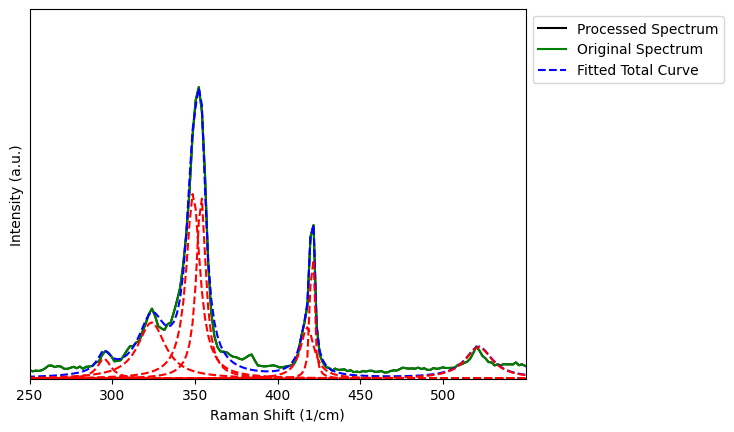

In [2]:
from renishawWiRE import WDFReader
from RamanFit import RamanFit # Import the class instead of the module

# Read data from .wdf file
filename = 'Raman Sample.wdf'
reader = WDFReader(filename)

# Focus on Raman shift = 240 to 560 1/cm (index 600 to 900 of the original data)
wavenumber = reader.xdata[300:780]  
spectra = reader.spectra[300:780]
spectra = spectra - min(spectra)  # Subtract background intensity

# Instantiate the RamanFit class
raman_fit = RamanFit(spectra, wavenumber,
                     normalize=True,
                     background_remove=False,
                     smoothing=False
                     )


# Update the fitting bounds 
bounds_dict = {
    # 'E12g(Γ)'     :   ([350, 0, 0], [353, 5, 5]),
    # '2LA(M)'      :   ([345, 0, 0], [350, 5, 5]),
    # 'LA(M)'      :   ([170, 0, 0], [175, 20, 5])
    '2LA(M)-2E22g(Γ)' : ([290, 0, 0], [305, 5, 5]),
    '2LA(M)-E22g(Γ)' : ([317, 0, 0], [325, 10, 10])
}
raman_fit.update_bounds(**bounds_dict)

## Remove Unecessary peaks
raman_fit.remove_peaks('W=O stretching','W=O bending','4LA(M)','A1g(M)+LA(M)','A1g(M)-LA(M)','LA(M)'
                       )

# Perform the fitting
params, params_cov = raman_fit.fit_spectrum()

# Plot the results with an offset and scale
xlim = [250, 550]
raman_fit.plot_fit(params, offset=0, 
                   scale=1, x_lim=xlim, 
                   y_lim=[0,4000], 
                   x_ticks=range(xlim[0],xlim[1],50))